#**Single Classifier vs Bagging vs Boosting**

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
data = load_wine()
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=data['feature_names'] + ['target'])

In [2]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [11]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**Single Classifier**

In [3]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=3)
# Cross validation
acc = cross_val_score(clf, data.data, data.target, cv=5)
print(f"{20*'-'} CrossVal {20*'-'}")
print(f"Results: {acc}\nMean: {acc.mean()}")

-------------------- CrossVal --------------------
Results: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]
Mean: 0.8882539682539681
---------------------- Skf ----------------------


2

**Bagging**

In [4]:
from sklearn.ensemble import BaggingClassifier

# Cross Validation
bag = BaggingClassifier(base_estimator=clf, n_estimators=50, random_state=1) # default classificator is DecisionTreeClassifier
acc_bag = cross_val_score(bag, data.data, data.target, cv=5)
print(f"Results: {acc_bag}\nMean: {acc_bag.mean()}")

Results: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]
Mean: 0.9498412698412698


**AdaBoost** 

In [5]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = DecisionTreeClassifier(random_state=1, min_samples_leaf=3, max_depth=1)
# Cross Validation
Ada = AdaBoostClassifier(base_estimator=clfAda, n_estimators=50, random_state=1, algorithm="SAMME")
acc_Ada = cross_val_score(Ada, data.data, data.target, cv=5)
print(f"Results: {acc_Ada}\nMean: {acc_Ada.mean()}")

Results: [0.83333333 0.91666667 0.91666667 1.         1.        ]
Mean: 0.9333333333333332


**Gradient Boosting**

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Cross Validation
clfGrad = DecisionTreeClassifier(random_state=1, min_samples_leaf=3, max_depth=1)
grad_Boost = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, min_samples_leaf=3, subsample=0.5, random_state=1)
grad_Boost.fit(X=data.data, y=data.target)
grad_acc = cross_val_score(grad_Boost, data.data, data.target, cv=5)
cum = np.cumsum(grad_Boost.oob_improvement_)
print(f"Results: {grad_acc}\nMean: {grad_acc.mean()}")
print(f"Cum: {cum}")


Results: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]
Mean: 0.8522222222222222
Cum: [0.70480913 0.78898321 0.82350824 0.85190548 0.86147413 0.86114602
 0.85407164 0.85367131 0.8577393  0.85887599 0.85901429 0.85999537
 0.86001277 0.86018797 0.85815787 0.86015928 0.85824554 0.85728004
 0.8574401  0.85612358 0.85613401 0.85626766 0.85664042 0.85671215
 0.85658207 0.85637385 0.85639413 0.8564111  0.85640054 0.85636098
 0.85636274 0.85638193 0.85637737 0.85637136 0.85636613 0.85634552
 0.8563506  0.85634036 0.85634693 0.85632922 0.85633148 0.85633975
 0.85633717 0.85633605 0.85633409 0.85633314 0.85633283 0.85633285
 0.85632628 0.85632712]


**Plot of oob improvement**

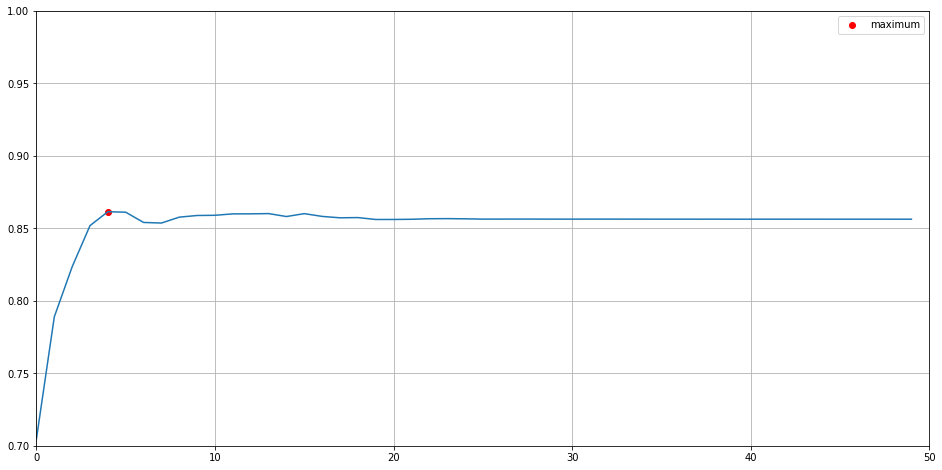

4


In [10]:
import matplotlib.pyplot as plt
max_iter = np.argmax(cum)
plt.figure(figsize=[16,8])
plt.plot(range(cum.shape[0]),cum)
plt.axis([0, 50, 0.7, 1])
plt.grid()
plt.scatter(max_iter, cum[max_iter], c='r', marker='o', label='maximum')
plt.legend()
plt.show()

The maximum value is in 4th iteration, but the more secure option is to chose value around 10 cause we see drop in 5-6 iteration and growth after that. Number of iterations abround 10 might give us bigger error but generally works better in predicting new enitities.  